In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [4]:
df=pd.read_csv('Further_clean_datasets/further_clean_all.csv')
df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_12140\789872118.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Further_clean_datasets/further_clean_all.csv')


,created_at,user_id,username,tweet,place,near,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS)
0,2021-01-06,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,NaN,parliament covid vaccine should days not weeks...,"['parliament', 'covid', 'vaccine', 'should', '...","['parliament', 'covid', 'vaccine', 'should', '...",parliament covid vaccine should day not week c...,"[('parliament', None), ('covid', None), ('vacc...",parliament covid vaccine should day not week...
1,2021-01-06,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,NaN,first dose vaccination syringe combating covid,"['first', 'dose', 'vaccination', 'syringe', 'c...","['first', 'dose', 'vaccination', 'syringe', 'c...",first dose vaccination syringe combating covid,"[('first', 'r'), ('dose', None), ('vaccination...",first dose vaccination syringe combat covid
2,2021-01-06,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,NaN,time forget about covid brexit trump sleep lis...,"['time', 'forget', 'about', 'covid', 'brexit',...","['time', 'forget', 'about', 'covid', 'brexit',...",time forget about covid brexit trump sleep lis...,"[('time', 'n'), ('forget', 'v'), ('about', Non...",time forget about covid brexit trump sleep l...
3,2021-01-06,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,NaN,rachel you absolutely nailed tonight throughou...,"['rachel', 'you', 'absolutely', 'nailed', 'ton...","['rachel', 'you', 'absolutely', 'nailed', 'ton...",rachel you absolutely nailed tonight throughou...,"[('rachel', None), ('you', None), ('absolutely...",rachel you absolutely nail tonight throughou...
4,2021-01-06,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,NaN,kids can never say they not wana their homewor...,"['kids', 'can', 'never', 'say', 'they', 'not',...","['kid', 'can', 'never', 'say', 'they', 'not', ...",kid can never say they not wana their homework...,"[('kids', 'n'), ('can', None), ('never', 'r'),...",kid can never say they not wana their homewo...


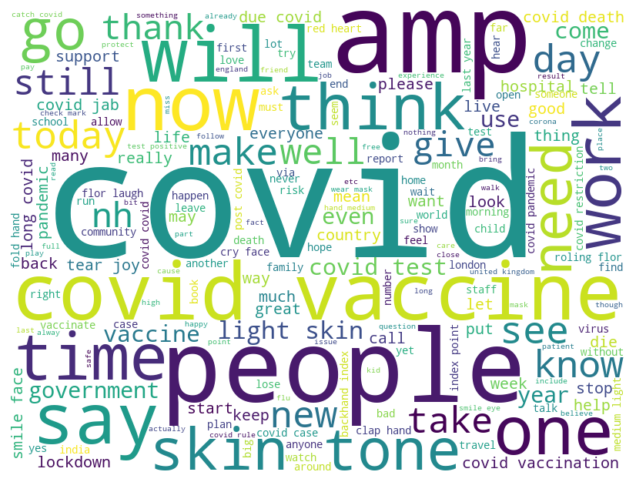

<Figure size 640x480 with 0 Axes>

In [5]:
#word cloud map
#https://www.datacamp.com/community/tutorials/wordcloud-python
def word_cloud(words):
    wordcloud = WordCloud(width=800, height=600, random_state=21, relative_scaling=0.5, background_color="white").generate(words)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
word_set = ' '.join([tweet_word for tweet_word in df['lemma_sentence(with POS)']])
word_cloud(word_set)
plt.savefig('word_cloud.jpg')
#vaccine is a hot topic

In [6]:
df['lemma'].value_counts()[0:10]

lemma
['covid']                                                                                                                                                                                                                                                                                                           51
['work', 'fernes', 'care', 'home', 'fareham', 'have', 'had', 'really', 'hard', 'challenging', 'time', 'during', 'covid', 'really', 'want', 'thank', 'team', 'with', 'shout', 'out', 'video', 'would', 'eternally', 'grateful', 'boost', 'team', 'morale', 'they', 'have', 'worked', 'hard']                         46
['parliament', 'covid', 'vaccine', 'should', 'day', 'not', 'week', 'challenge', 'government', 'sign', 'petition', 'via']                                                                                                                                                                                            35
['help', 'slow', 'spread', 'covid', 'identify', 'risk', 'case

In [8]:
#Word frequency
from nltk.tokenize import word_tokenize
from collections import Counter
from collections import Counter
texts = df['lemma_sentence(with POS)']
word_counts = Counter(word_tokenize('\n'.join(texts)))
word_top=word_counts.most_common(n=20)
print(word_top)
# count_sum=

[('covid', 72415), ('have', 26204), ('not', 24111), ('for', 21940), ('with', 18990), ('you', 16968), ('are', 15789), ('that', 14694), ('this', 14166), ('face', 11222), ('get', 10062), ('vaccine', 9520), ('but', 9336), ('from', 9328), ('all', 8698), ('people', 8568), ('they', 8556), ('amp', 7979), ('was', 7241), ('will', 6910)]


9367644


Text(0.5, 1.0, 'Word Frequency Chart')

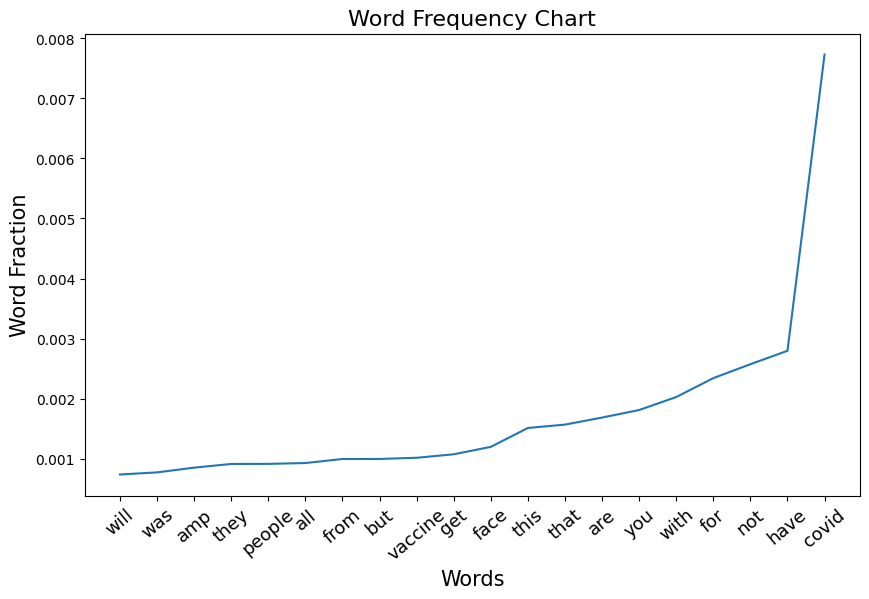

In [9]:
#(5)
count_all = df['lemma_sentence(with POS)'].str.len().sum()
print(count_all)

words=[count[0] for count in word_top]
frac_value=[int(count[1])/count_all for count in  word_top]
words=words[: :-1]
frac_value=sorted(frac_value)

#plot line chart
plt.figure(figsize=(10, 6))
plt.plot(words,frac_value)
plt.xticks(rotation=40, fontsize=13)
plt.xlabel('Words',fontsize=15)
plt.ylabel('Word Fraction',fontsize=15)
plt.title('Word Frequency Chart',fontsize=16)